# 1. Import Modules and Data

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
df = pd.read_csv('data/movies.csv')
df.tail(10)

,language,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,directorsName,writersName
10440,en,No Way Out,0.0,2022.0,89.0,"['Action', 'Crime', 'Thriller']",3.7,543.0,['Azi Rahman'],['Keith Kjarval']
10441,en,I Care a Lot,0.0,2020.0,118.0,"['Comedy', 'Crime', 'Drama']",6.4,150852.0,['J Blakeson'],['J Blakeson']
10442,en,Upin & Ipin: Keris Siamang Tunggal,0.0,2019.0,100.0,"['Adventure', 'Animation', 'Comedy']",7.2,873.0,"['Adam Bin Amiruddin', 'Syed Nurfaiz Khalid bi...","['Hjh. Ainon Ariff', 'Nur Naquyah bt Burhanudd..."
10443,en,The Hunting,0.0,2021.0,93.0,"['Horror', 'Mystery', 'Thriller']",3.0,507.0,['Mark Andrew Hamer'],"['Mark Andrew Hamer', 'Heather Ryan', 'Terranc..."
10444,NaN,The Sacred Riana: Beginning,0.0,2019.0,111.0,['Horror'],4.5,159.0,['Billy Christian'],"['Billy Christian', 'Andy Oesman']"
10445,en,Scrapper,0.0,2021.0,87.0,"['Crime', 'Drama', 'Thriller']",4.3,1464.0,['Bari Kang'],['Bari Kang']
10446,NaN,Leak (Penangkeb),0.0,2019.0,75.0,['Horror'],7.3,12.0,['Mimi Jegon'],['Mimi Jegon']
10447,en,The Cursed,0.0,2021.0,111.0,"['Fantasy', 'Horror', 'Mystery']",6.2,19091.0,['Sean Ellis'],['Sean Ellis']
10448,en,Blind Ambition,0.0,2021.0,96.0,['Documentary'],7.1,315.0,"['Robert Coe', 'Warwick Ross']","['Robert Coe', 'Paul Murphy', 'Madeleine Ross'..."
10449,NaN,Kuambil Lagi Hatiku,0.0,2019.0,123.0,['Drama'],8.3,9.0,['Azhar Kinoi Lubis'],"['Arief Ash Siddiq', 'Rino Sarjono', 'Salman A..."


# 2. Data Preprocessing

In [3]:
# mengurutkan data berdasarkan kolom startYear (tahun rilis)
df = df.sort_values(by='startYear').reset_index(drop=True)
df

,language,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,directorsName,writersName
0,en,Tsarsulis sashinelebani 2 (atasis pasad),0.0,1925.0,50.0,"['Action', 'Adventure', 'Drama']",1.8,19.0,['Vladimir Barskiy'],['Grigori Arustanov']
1,en,Spangles,0.0,1926.0,77.0,"['Drama', 'Romance']",6.2,34.0,"[""Frank O'Connor""]","['Nellie Revell', 'Hugh Hoffman', 'Leah Baird'..."
2,NaN,Loetoeng Kasaroeng,0.0,1926.0,60.0,['Fantasy'],7.3,12.0,"['L. Heuveldorp', 'G. Krugers']",[]
3,en,Metropolis,0.0,1927.0,153.0,"['Drama', 'Sci-Fi']",8.3,191279.0,['Fritz Lang'],"['Thea von Harbou', 'Fritz Lang']"
4,en,Ankara postasi,0.0,1928.0,80.0,"['Drama', 'War']",6.5,22.0,['Muhsin Ertugrul'],"['François de Curel', 'Muhsin Ertugrul', 'Resa..."
...,...,...,...,...,...,...,...,...,...,...
10445,id,Utusan Iblis: Dia Yang Berada di Antara Kita,0.0,2025.0,90.0,['Horror'],NaN,NaN,['Dyan Sunu Prastowo'],['Gerald Mamahit']
10446,en,Zanna: Whisper of Volcano Isle,0.0,2025.0,94.0,"['Adventure', 'Animation', 'Comedy']",NaN,NaN,['Larry Whitaker'],['Doug Sinclair']
10447,id,This City Is a Battlefield,0.0,2025.0,119.0,"['Action', 'Drama', 'History']",NaN,NaN,['Mouly Surya'],"['Mochtar Lubis', 'Mouly Surya']"
10448,NaN,Go Kill,0.0,2025.0,90.0,"['Comedy', 'Crime', 'Drama']",NaN,NaN,['Anas Lutfi'],"['Eamonn Sadler', 'Mo Sidik', 'Wayne William-S..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   language        8784 non-null   object 
 1   primaryTitle    10450 non-null  object 
 2   isAdult         10450 non-null  float64
 3   startYear       10450 non-null  float64
 4   runtimeMinutes  10450 non-null  float64
 5   genres          10450 non-null  object 
 6   averageRating   9879 non-null   float64
 7   numVotes        9879 non-null   float64
 8   directorsName   10450 non-null  object 
 9   writersName     10450 non-null  object 
dtypes: float64(5), object(5)
memory usage: 816.5+ KB


In [5]:
df.describe()

,isAdult,startYear,runtimeMinutes,averageRating,numVotes
count,10450.000000,10450.000000,10450.000000,9879.000000,9.879000e+03
mean,0.000383,2011.037129,108.258852,6.092236,6.393040e+04
std,0.019562,14.730590,502.436986,1.295311,1.822162e+05
min,0.000000,1925.000000,10.000000,1.000000,5.000000e+00
25%,0.000000,2007.000000,90.000000,5.300000,2.250000e+02
50%,0.000000,2017.000000,100.000000,6.200000,1.959000e+03
75%,0.000000,2021.000000,114.000000,7.000000,3.237550e+04
max,1.000000,2025.000000,51420.000000,9.800000,2.978542e+06


## 2.1. Missing Value

In [6]:
df.isna().sum()

language          1666
primaryTitle         0
isAdult              0
startYear            0
runtimeMinutes       0
genres               0
averageRating      571
numVotes           571
directorsName        0
writersName          0
dtype: int64

In [7]:
df['language'].value_counts()

language
en    8135
id     649
Name: count, dtype: int64

In [8]:
df['language'] = df['language'].fillna('id')
df.isna().sum()

language            0
primaryTitle        0
isAdult             0
startYear           0
runtimeMinutes      0
genres              0
averageRating     571
numVotes          571
directorsName       0
writersName         0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isna().sum()

language          0
primaryTitle      0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
directorsName     0
writersName       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9879 entries, 0 to 10440
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   language        9879 non-null   object 
 1   primaryTitle    9879 non-null   object 
 2   isAdult         9879 non-null   float64
 3   startYear       9879 non-null   float64
 4   runtimeMinutes  9879 non-null   float64
 5   genres          9879 non-null   object 
 6   averageRating   9879 non-null   float64
 7   numVotes        9879 non-null   float64
 8   directorsName   9879 non-null   object 
 9   writersName     9879 non-null   object 
dtypes: float64(5), object(5)
memory usage: 849.0+ KB


## 2.2. Tipe Data

In [11]:
float_columns = df.select_dtypes(include=['float64']).columns
filtered_float_columns = float_columns.drop('averageRating')
df[filtered_float_columns] = df[filtered_float_columns].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9879 entries, 0 to 10440
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   language        9879 non-null   object 
 1   primaryTitle    9879 non-null   object 
 2   isAdult         9879 non-null   int32  
 3   startYear       9879 non-null   int32  
 4   runtimeMinutes  9879 non-null   int32  
 5   genres          9879 non-null   object 
 6   averageRating   9879 non-null   float64
 7   numVotes        9879 non-null   int32  
 8   directorsName   9879 non-null   object 
 9   writersName     9879 non-null   object 
dtypes: float64(1), int32(4), object(5)
memory usage: 694.6+ KB


## 2.3. Duplicated Data

In [12]:
df.duplicated().sum()

161

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## 2.4. Normalisasi Nilai

### 2.4.1. Periksa Kolom isAdult

In [14]:
df['isAdult'] = df['isAdult'].apply(lambda x: 1 if x == 1 else 0)
df['isAdult'].value_counts()

isAdult
0    9716
1       2
Name: count, dtype: int64

Karena persebaran datanya tidak bagus, maka dihapus aja

In [15]:
df.drop(columns=['isAdult'], inplace=True)
df.head()

,language,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directorsName,writersName
0,en,Tsarsulis sashinelebani 2 (atasis pasad),1925,50,"['Action', 'Adventure', 'Drama']",1.8,19,['Vladimir Barskiy'],['Grigori Arustanov']
1,en,Spangles,1926,77,"['Drama', 'Romance']",6.2,34,"[""Frank O'Connor""]","['Nellie Revell', 'Hugh Hoffman', 'Leah Baird'..."
2,id,Loetoeng Kasaroeng,1926,60,['Fantasy'],7.3,12,"['L. Heuveldorp', 'G. Krugers']",[]
3,en,Metropolis,1927,153,"['Drama', 'Sci-Fi']",8.3,191279,['Fritz Lang'],"['Thea von Harbou', 'Fritz Lang']"
4,en,Ankara postasi,1928,80,"['Drama', 'War']",6.5,22,['Muhsin Ertugrul'],"['François de Curel', 'Muhsin Ertugrul', 'Resa..."


### 2.4.2. Periksa kolom genres, directorsName, writersName

In [16]:
# periksa tipe data pada kolom genres, directorsName, dan writersName
print(df['genres'].apply(type).unique())
print(df['directorsName'].apply(type).unique())
print(df['writersName'].apply(type).unique())


[<class 'str'>]
[<class 'str'>]
[<class 'str'>]


In [17]:
# ubah tipe data pada kolom genres, directorsName, dan writersName menjadi list
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['directorsName'] = df['directorsName'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['writersName'] = df['writersName'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [18]:
# bersihkan data pada kolom genres, directorsName, dan writersName
df['genres'] = df['genres'].apply(lambda x: [genre.strip() for genre in x if genre] if isinstance(x, list) else [])
df['directorsName'] = df['directorsName'].apply(lambda x: [name.strip() for name in x if name] if isinstance(x, list) else [])
df['writersName'] = df['writersName'].apply(lambda x: [name.strip() for name in x if name] if isinstance(x, list) else [])

In [19]:
# periksa tipe data pada kolom genres, directorsName, dan writersName
print(df['genres'].apply(type).unique())
print(df['directorsName'].apply(type).unique())
print(df['writersName'].apply(type).unique())


[<class 'list'>]
[<class 'list'>]
[<class 'list'>]


### 2.4.3. Periksa Kolom yang nilainya tidak relevan

In [20]:
df['runtimeMinutes'].describe()

count     9718.000000
mean       109.366742
std        520.967986
min         45.000000
25%         90.000000
50%        100.000000
75%        114.000000
max      51420.000000
Name: runtimeMinutes, dtype: float64

Durasi 51420 menit kurang relevan, maka diubah ke nilai rata-rata

In [21]:
# Ganti outlier dengan nilai median
df['runtimeMinutes'] = df['runtimeMinutes'].apply(lambda x: df['runtimeMinutes'].median() if x > 300 else x)
df['runtimeMinutes'].describe()

count    9718.000000
mean      104.064725
std        20.729945
min        45.000000
25%        90.000000
50%       100.000000
75%       114.000000
max       262.000000
Name: runtimeMinutes, dtype: float64

## 2.5. Feature Enginering

### 2.5.1. Create column

In [ ]:
# filmAge
current_year = datetime.now().year
df['filmAge'] = df['startYear'].apply(lambda x: current_year - x if pd.notnull(x) else None)
df.head()


,language,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directorsName,writersName,filmAge
0,en,Tsarsulis sashinelebani 2 (atasis pasad),1925,50.0,"[Action, Adventure, Drama]",1.8,19,[Vladimir Barskiy],[Grigori Arustanov],99
1,en,Spangles,1926,77.0,"[Drama, Romance]",6.2,34,[Frank O'Connor],"[Nellie Revell, Hugh Hoffman, Leah Baird, Walt...",98
2,id,Loetoeng Kasaroeng,1926,60.0,[Fantasy],7.3,12,"[L. Heuveldorp, G. Krugers]",[],98
3,en,Metropolis,1927,153.0,"[Drama, Sci-Fi]",8.3,191279,[Fritz Lang],"[Thea von Harbou, Fritz Lang]",97
4,en,Ankara postasi,1928,80.0,"[Drama, War]",6.5,22,[Muhsin Ertugrul],"[François de Curel, Muhsin Ertugrul, Resat Nur...",96


In [23]:
# runtimeCategory

def categorize_runtime(runtime):
    if runtime <= 60:
        return 'short'
    elif 60 < runtime <= 120:
        return 'medium'
    else:
        return 'long'

df['runtimeCategory'] = df['runtimeMinutes'].apply(categorize_runtime)
df.head()

,language,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directorsName,writersName,filmAge,runtimeCategory
0,en,Tsarsulis sashinelebani 2 (atasis pasad),1925,50.0,"[Action, Adventure, Drama]",1.8,19,[Vladimir Barskiy],[Grigori Arustanov],99,short
1,en,Spangles,1926,77.0,"[Drama, Romance]",6.2,34,[Frank O'Connor],"[Nellie Revell, Hugh Hoffman, Leah Baird, Walt...",98,medium
2,id,Loetoeng Kasaroeng,1926,60.0,[Fantasy],7.3,12,"[L. Heuveldorp, G. Krugers]",[],98,short
3,en,Metropolis,1927,153.0,"[Drama, Sci-Fi]",8.3,191279,[Fritz Lang],"[Thea von Harbou, Fritz Lang]",97,long
4,en,Ankara postasi,1928,80.0,"[Drama, War]",6.5,22,[Muhsin Ertugrul],"[François de Curel, Muhsin Ertugrul, Resat Nur...",96,medium


In [24]:
df.columns

Index(['language', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'directorsName', 'writersName', 'filmAge',
       'runtimeCategory'],
      dtype='object')

In [25]:
df.isna().sum()

language           0
primaryTitle       0
startYear          0
runtimeMinutes     0
genres             0
averageRating      0
numVotes           0
directorsName      0
writersName        0
filmAge            0
runtimeCategory    0
dtype: int64

In [26]:
df.to_csv('dashboard/movies.csv', index=False)

# 3. Exploratory Data Analysis

## 3.1. Distribusi Data Numerik

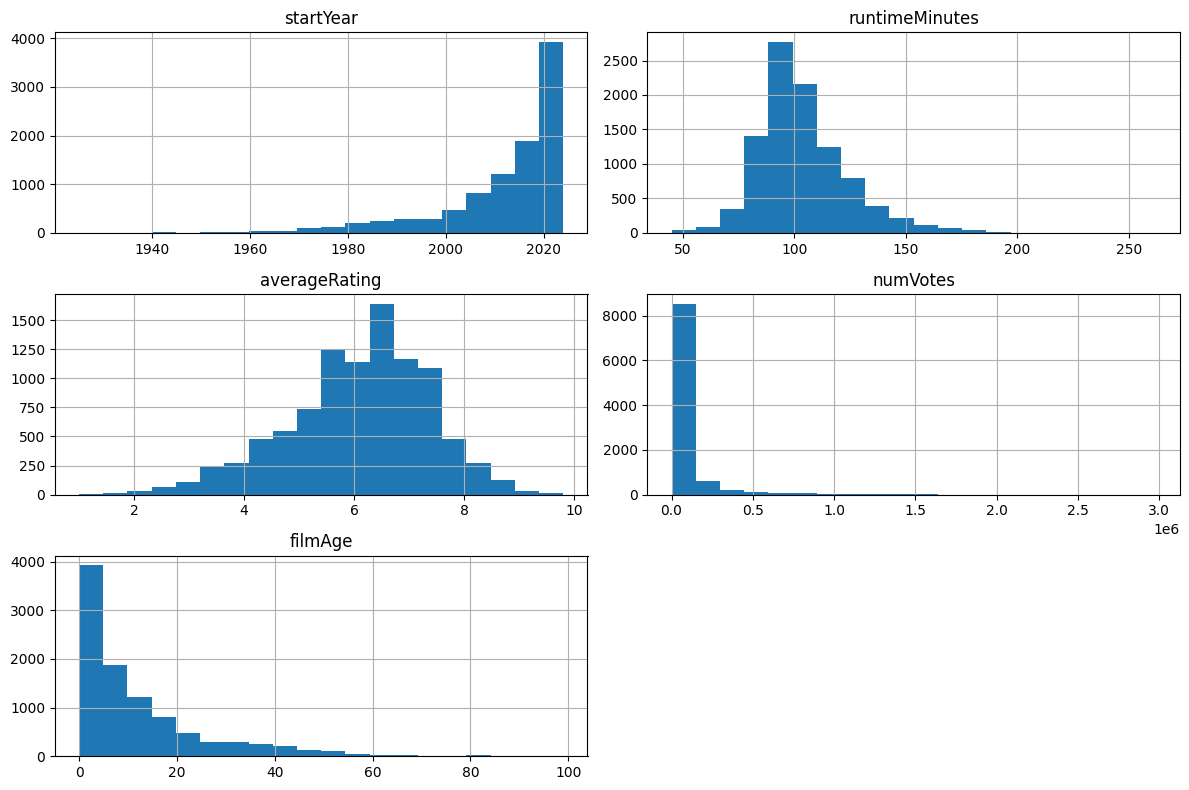

In [ ]:
# Histogram untuk distribusi kolom numerik
df[['startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'filmAge']].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

1. startYear: Grafik ini menunjukkan jumlah film yang dirilis setiap tahun. Terlihat jelas peningkatan jumlah film yang dirilis dari tahun ke tahun, terutama setelah tahun 1980-an.
Kesimpulan: Industri perfilman mengalami pertumbuhan yang signifikan dalam beberapa dekade terakhir.

2. runtimeMinutes: Grafik ini menunjukkan distribusi durasi film. Sebagian besar film memiliki durasi antara 60-120 menit.
Kesimpulan: Durasi film yang paling umum adalah sekitar 1-2 jam. Ada beberapa film dengan durasi yang sangat panjang (lebih dari 240 menit), yang mungkin merupakan film epik atau film dokumenter.

3. averageRating: Grafik ini menunjukkan distribusi rating rata-rata yang diberikan penonton. Sebagian besar film memiliki rating antara 5-7.
Kesimpulan: Secara umum, film-film dalam dataset Anda memiliki rating yang cukup baik.

4. numVotes: Grafik ini menunjukkan distribusi jumlah suara yang diterima oleh setiap film. Sebagian besar film memiliki jumlah suara yang relatif sedikit, namun ada beberapa film yang sangat populer dan mendapatkan jutaan suara.
Kesimpulan: Popularitas film sangat bervariasi. Ada beberapa film blockbuster yang sangat terkenal dan banyak ditonton, namun sebagian besar film mungkin tidak sepopuler itu.

5. filmAge: Grafik ini menunjukkan distribusi usia film dari tahun 1925-sekarang.
Kesimpulan: Sebagian besar film relatif baru berkisar antara 0-20 tahun 

## 3.2. Analisis Data Kategorikal

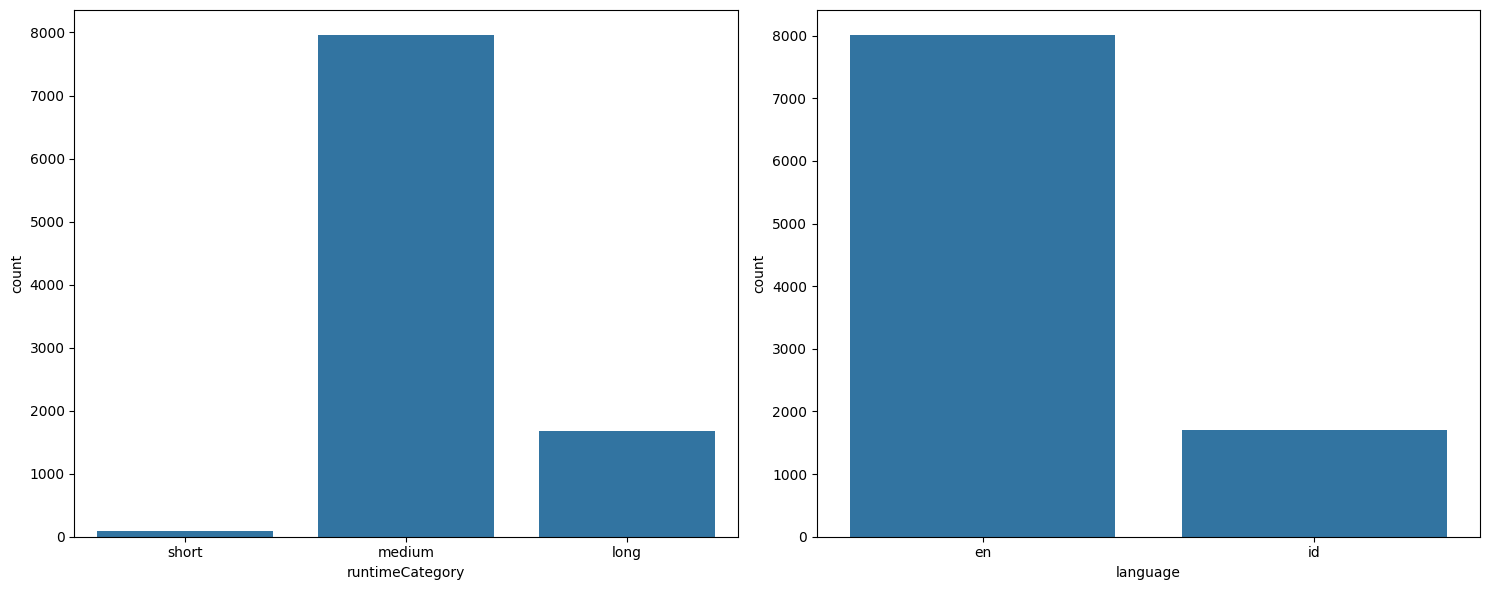

In [28]:
# Plot countplot untuk 'runtimeCategory' dan 'language'
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(data=df, x='runtimeCategory', ax=ax[0])
sns.countplot(data=df, x='language', ax=ax[1])
plt.tight_layout()
plt.show()


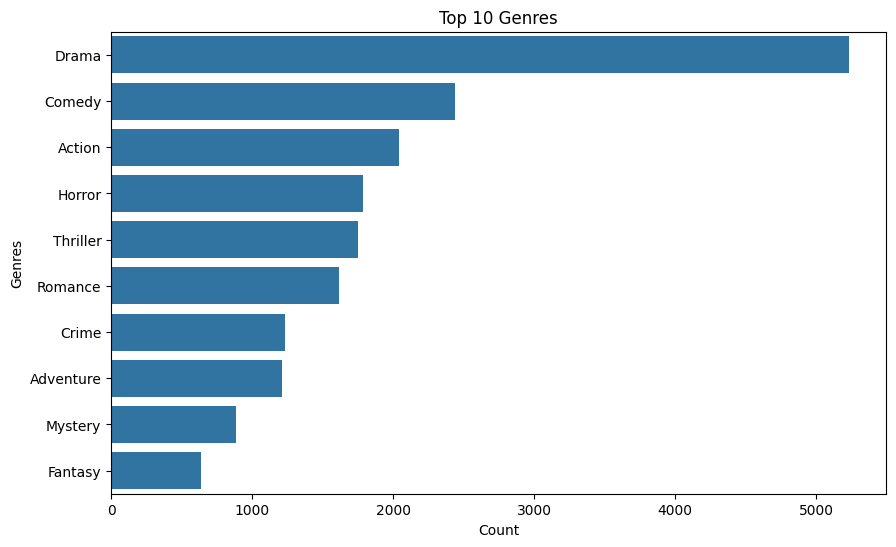

In [29]:
# Meledakkan kolom 'genres' dan menghitung frekuensi genre
top_genres = df['genres'].explode().value_counts().head(10)

# Plotting Top 10 Genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()


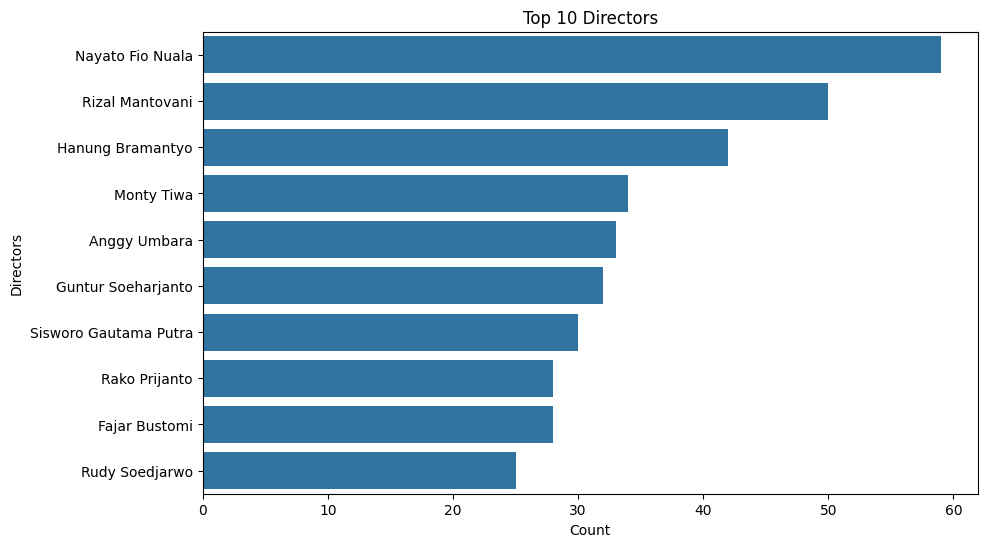

In [30]:
# Meledakkan kolom 'directorsName' dan menghitung frekuensi sutradara
top_directors = df['directorsName'].explode().value_counts().head(10)

# Plotting Top 10 Directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors')
plt.xlabel('Count')
plt.ylabel('Directors')
plt.show()


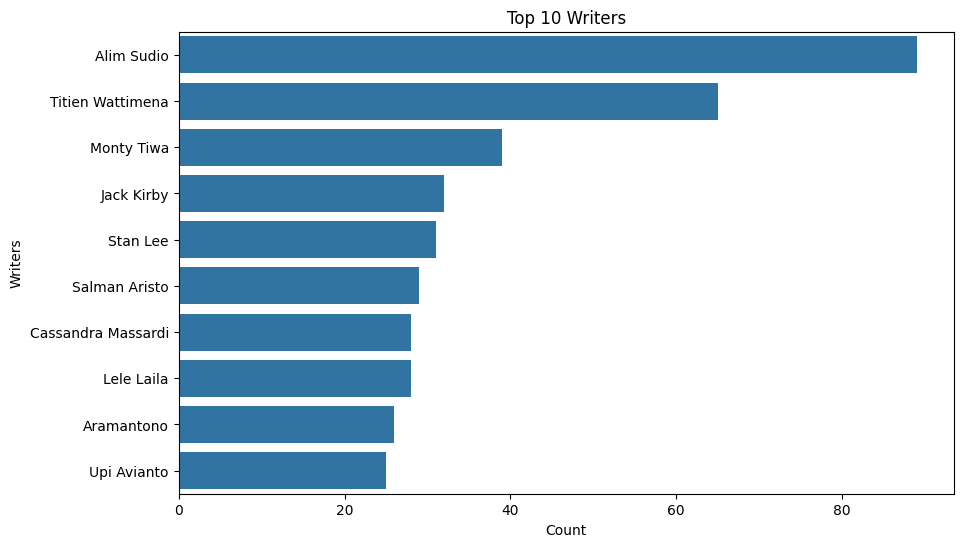

In [31]:
# Meledakkan kolom 'writersName' dan menghitung frekuensi penulis
top_writers = df['writersName'].explode().value_counts().head(10)

# Plotting Top 10 Writers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_writers.values, y=top_writers.index)
plt.title('Top 10 Writers')
plt.xlabel('Count')
plt.ylabel('Writers')
plt.show()


## 3.3. Perbandingan Rating Genre

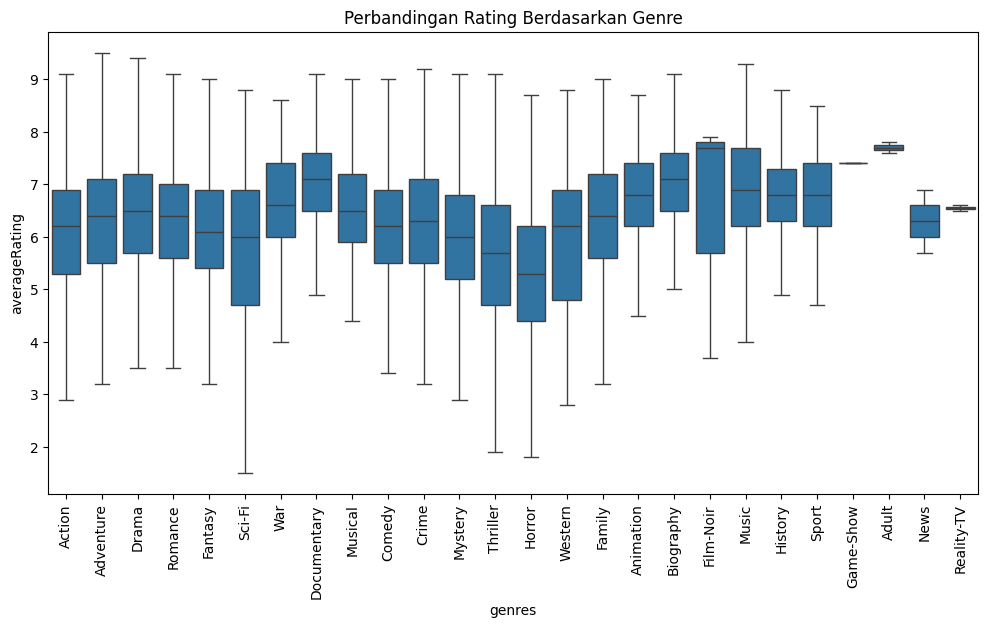

In [32]:
# Meledakkan kolom 'genres' menjadi baris terpisah
df_exploded = df.explode('genres')

# Rating berdasarkan genre (menggunakan boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='averageRating', data=df_exploded, showfliers=False)
plt.title('Perbandingan Rating Berdasarkan Genre')
plt.xticks(rotation=90)
plt.show()



## 3.4. Analisis Korelasi

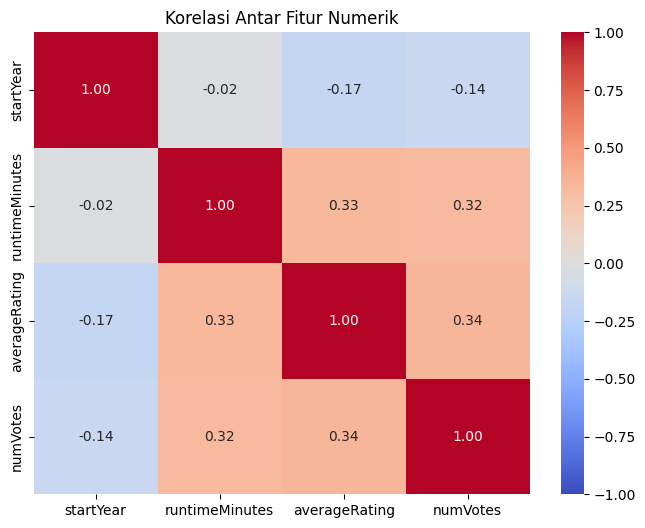

In [33]:
# Korelasi antar kolom numerik
correlation_matrix = df[['startYear', 'runtimeMinutes', 'averageRating', 'numVotes']].corr()

# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Korelasi Antar Fitur Numerik')
plt.show()


## 3.5. Hubungan antarvariabel

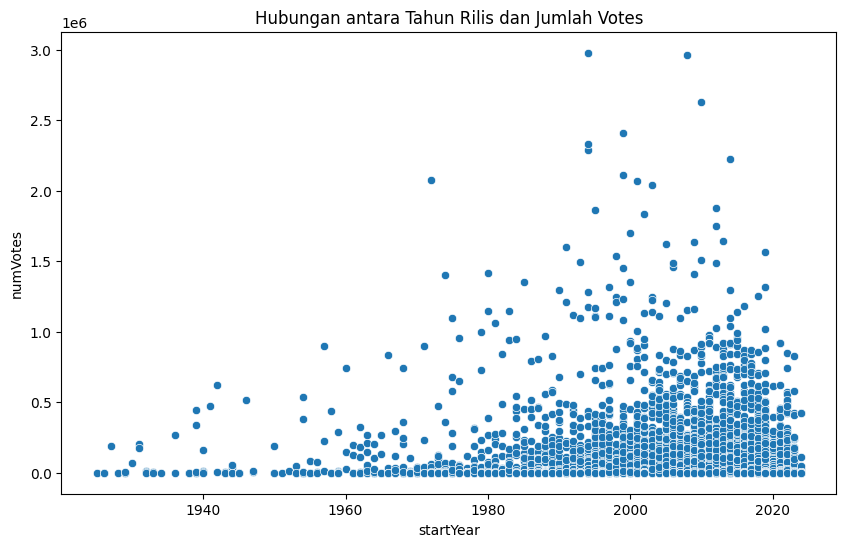

In [34]:
# Visualisasi hubungan antara tahun rilis dan usia film
plt.figure(figsize=(10, 6))
sns.scatterplot(x='startYear', y='numVotes', data=df)
plt.title('Hubungan antara Tahun Rilis dan Jumlah Votes')
plt.show()


Tren Meningkat: Terlihat adanya tren peningkatan jumlah suara seiring berjalannya waktu, terutama setelah tahun 1980-an. Ini menunjukkan bahwa film-film yang dirilis dalam beberapa dekade terakhir cenderung mendapatkan lebih banyak suara dibandingkan film-film yang dirilis sebelumnya. 

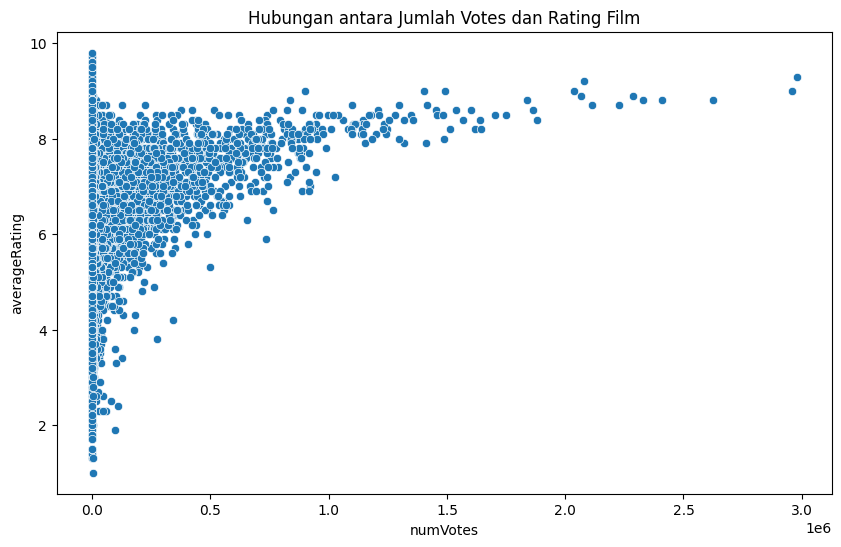

In [ ]:
# Scatterplot antara rating dan jumlah votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numVotes', y='averageRating', data=df)
plt.title('Hubungan antara Jumlah Votes dan Rating Film')
plt.show()


Tidak terlihat adanya korelasi yang kuat antara jumlah suara dan rating rata-rata film, jumlah suara yang tinggi tidak selalu menjamin rating yang tinggi